In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("costumer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4256,8207-VVMYB,Female,0,Yes,No,70,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),26.00,2006.95,No
2676,1872-EBWSC,Female,0,No,No,29,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.35,617.35,No
2743,2323-ARSVR,Male,0,Yes,No,67,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,111.05,7321.05,No
1829,3030-YDNRM,Male,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.85,572.45,No
5444,1833-TCXKK,Male,0,Yes,No,45,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),107.75,4882.8,No


In [4]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
517400/df.shape[0]

73.46301292063042

In [6]:
df.drop('customerID',axis='columns',inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.shape

(7043, 20)

In [12]:
df.iloc[488].TotalCharges

' '

In [13]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [14]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [15]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [17]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [18]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


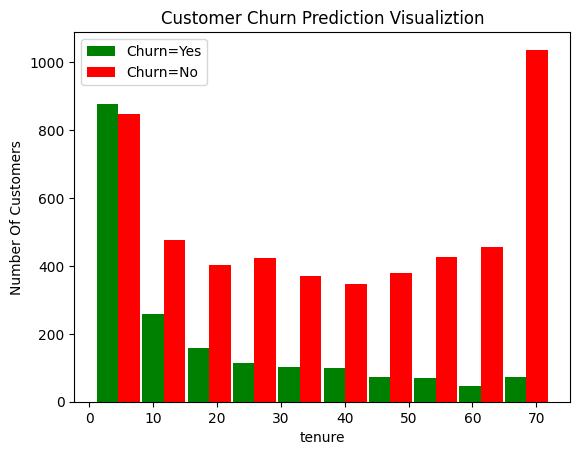

In [19]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

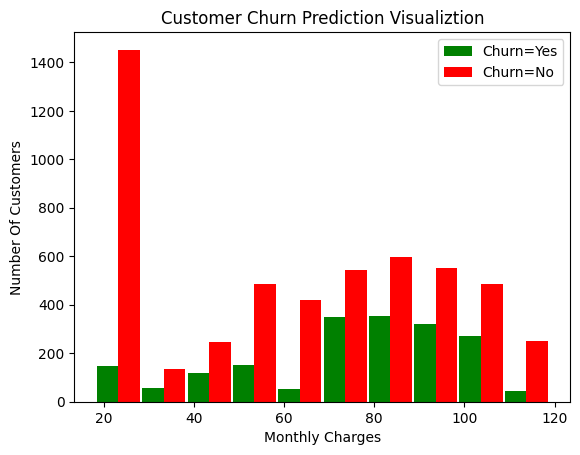

In [20]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [21]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [24]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [25]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [26]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [27]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
df1.gender.unique()

array([1, 0])

In [29]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1287,1,0,1,1,30,1,1,0,1,1,...,False,True,False,True,False,False,False,False,True,False
1517,0,0,1,0,56,1,1,1,0,0,...,False,True,False,False,True,False,False,False,True,False
2052,1,0,0,0,48,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
2552,1,0,1,0,47,1,1,0,0,0,...,False,False,True,False,True,False,False,False,True,False
2198,1,0,1,1,17,1,1,0,0,1,...,True,False,False,False,True,False,False,False,False,True


In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [33]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [34]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [35]:
y_train.value_counts()

Churn
0.0    4130
1.0    1495
Name: count, dtype: int64

In [36]:
y.value_counts()

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

In [37]:
5163/1869

2.7624398073836276

In [38]:
y_test.value_counts()

Churn
0.0    1033
1.0     374
Name: count, dtype: int64

In [39]:
X_train.shape

(5625, 26)

In [40]:
X_test.shape

(1407, 26)

In [41]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
2446,1,0,0,0,0.239437,1,1,0,1,0,...,False,True,False,True,False,False,False,True,False,False
1680,0,0,1,1,0.774648,1,1,0,0,0,...,False,False,True,False,True,False,False,False,False,True
2220,0,0,1,0,1.000000,1,0,1,1,0,...,True,False,False,False,False,True,True,False,False,False
2842,1,0,0,0,0.042254,0,0,1,0,1,...,True,False,False,True,False,False,False,False,False,True
5131,1,0,1,0,0.605634,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
4372,0,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
4687,0,0,1,0,0.295775,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
2385,1,0,0,1,0.028169,0,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True
6773,0,1,1,0,0.507042,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [42]:
len(X_train.columns)

26

In [44]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [48]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

def ANN(X_train, y_train, X_test, y_test, loss, weights):

    X_train = X_train.astype(np.float32)
    y_train = y_train.astype(np.float32)
    X_test = X_test.astype(np.float32)
    y_test = y_test.astype(np.float32)

    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [49]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5291 - accuracy: 0.7200
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.7929
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8000
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8009
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8039
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8048
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8053
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8053
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8044
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4035 - accura

 Managing the skewness of the data
## 1 Undersampling

In [51]:
count_class_0, count_class_1 = df1.Churn.value_counts()

df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [52]:
df_class_0.shape

(5163, 27)

In [53]:
df_class_1.shape

(1869, 27)

In [54]:
count_class_0, count_class_1

(5163, 1869)

In [55]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [60]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [61]:
X = df_test_under.drop('Churn', axis = 'columns')
y = df_test_under['Churn']

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [63]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [64]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6151 - accuracy: 0.6732
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7492
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7575
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7629
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7609
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.7652
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4867 - accuracy: 0.7652
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7676
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7662
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7702
Epoch 11/

2. Oversampling

In [65]:
count_class_0, count_class_1

(5163, 1869)

In [70]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over], axis=0)
print("Random over-sampling:")
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [71]:
X = df_test_over.drop('Churn', axis = 'columns')
y = df_test_over['Churn']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [73]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [74]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5385 - accuracy: 0.7332
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4936 - accuracy: 0.7649
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4868 - accuracy: 0.7669
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4825 - accuracy: 0.7702
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4788 - accuracy: 0.7718
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4761 - accuracy: 0.7746
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4727 - accuracy: 0.7771
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4710 - accuracy: 0.7780
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4687 - accuracy: 0.7787
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4656 - accura

3. SMOTE

In [76]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [77]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [81]:
!pip install imbalanced-learn

In [88]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [85]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [90]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [91]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5405 - accuracy: 0.7361
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.7787
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4623 - accuracy: 0.7826
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.7835
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4522 - accuracy: 0.7857
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4470 - accuracy: 0.7883
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4432 - accuracy: 0.7909
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4403 - accuracy: 0.7901
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4379 - accuracy: 0.7929
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4333 - accura

In [92]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [93]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [95]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [96]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [97]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,True,False,True,False,False,False,False,False,True,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,True,False,True,False,False,False,True,False,False,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,False,False,False,False,True,True,False,False,False,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,False,False,True,False,False,False,False,False,True,0


In [98]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [99]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [100]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6533 - accuracy: 0.6562
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7559
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.7632
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.7656
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.7712
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4822 - accuracy: 0.7696
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7753
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.7739
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4752 - accuracy: 0.7756
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7779
Epoch 11/

In [101]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6275 - accuracy: 0.6806
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7555
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7602
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7639
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7625
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7595
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7649
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7679
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7706
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.7669
Epoch 11/

In [102]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.6778 - accuracy: 0.5958
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5510 - accuracy: 0.7461
Epoch 3/100
83/83 [==============================] - 0s 4ms/step - loss: 0.5000 - accuracy: 0.7628
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.7674
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.7658
Epoch 6/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4764 - accuracy: 0.7750
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.7689
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.7787
Epoch 9/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4681 - accuracy: 0.7727
Epoch 10/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.7753
Epoch 11/

In [103]:
len(y_pred1)

1407

In [104]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [105]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1033
           1       0.47      0.77      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.73      1407

